<center><h1>DSCI 552: Machine Learning for Data Science</h1></center><br>
<center>Acute Inflammations</center>

<h3>Homework 5</h3>
<p></p>
<b><span>Name: Sri Manvith Vaddeboyina</span></b><br>
<b><span>USC ID: 1231409457</span></b><br>
<b><span>Github username: srimanvithv</span></b>

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn import tree
import statsmodels.api as sm
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV,Ridge
from sklearn.linear_model import LassoCV,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score,classification_report

warnings.filterwarnings('ignore')
!python -m pip install xgboost
!python -m pip install scikit-multilearn

### (a) Obtain Data

(a)
Download the Accute Inflamations data from
https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

 <u><b>Columns:</b></u><br>
 <b>a1:</b>	Temperature of patient  { 35C-42C }	
 <b>a2:</b>	Occurrence of nausea  { yes, no }	
 <b>a3:</b>	Lumbar pain  { yes, no }	
 <b>a4:</b>	Urine pushing (continuous need for urination)  { yes, no }	
 <b>a5:</b>	Micturition pains  { yes, no }	
 <b>a6:</b>	Burning of urethra, itch, swelling of urethra outlet  { yes, no }	
 <b>d1:</b>	decision: Inflammation of urinary bladder  { yes, no }	
 <b>d2:</b>	decision: Nephritis of renal pelvis origin { yes, no }	

In [2]:
diagnosis_data = pd.read_csv("../data/diagnosis.data", names = ['temperature','occurence_of_nausea','lumbar_pain','urine_pushing','micturition_pains','burning_of_urethra','decision_inflammation','decision_nephritis'], sep = '\s+', encoding = 'UTF_16', header = None, decimal=',')
diagnosis_data

temperature occurence_of_nausea lumbar_pain urine_pushing  \
0           35.5                  no         yes            no   
1           35.9                  no          no           yes   
2           35.9                  no         yes            no   
3           36.0                  no          no           yes   
4           36.0                  no         yes            no   
..           ...                 ...         ...           ...   
115         41.4                  no         yes           yes   
116         41.5                  no          no            no   
117         41.5                 yes         yes            no   
118         41.5                  no         yes           yes   
119         41.5                  no         yes           yes   

    micturition_pains burning_of_urethra decision_inflammation  \
0                  no                 no                    no   
1                 yes                yes                   yes   
2                  no                 no                    no   
3                 yes                yes                   yes   
4                  no                 no                    no   
..                ...                ...                   ...   
115                no                yes                    no   
116                no                 no                    no   
117               yes                 no                    no   
118                no                yes                    no   
119                no                yes                    no   

    decision_nephritis  
0                   no  
1                   no  
2                   no  
3                   no  
4                   no  
..                 ...  
115                yes  
116                 no  
117                yes  
118                yes  
119                yes  

[120 rows x 8 columns]

In [3]:
diagnosis_data = diagnosis_data.apply(lambda col: col.map({'no': 0, 'yes': 1}) if col.dtype == object else col)
diagnosis_data

temperature  occurence_of_nausea  lumbar_pain  urine_pushing  \
0           35.5                    0            1              0   
1           35.9                    0            0              1   
2           35.9                    0            1              0   
3           36.0                    0            0              1   
4           36.0                    0            1              0   
..           ...                  ...          ...            ...   
115         41.4                    0            1              1   
116         41.5                    0            0              0   
117         41.5                    1            1              0   
118         41.5                    0            1              1   
119         41.5                    0            1              1   

     micturition_pains  burning_of_urethra  decision_inflammation  \
0                    0                   0                      0   
1                    1                   1                      1   
2                    0                   0                      0   
3                    1                   1                      1   
4                    0                   0                      0   
..                 ...                 ...                    ...   
115                  0                   1                      0   
116                  0                   0                      0   
117                  1                   0                      0   
118                  0                   1                      0   
119                  0                   1                      0   

     decision_nephritis  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
..                  ...  
115                   1  
116                   0  
117                   1  
118                   1  
119                   1  

[120 rows x 8 columns]

### (b) Build a decision tree
Build a decision tree on the whole data set and plot it.

In [4]:
X = diagnosis_data.iloc[:,:-2]
y, y1, y2 = diagnosis_data.iloc[:,-2:], diagnosis_data.iloc[:,-2:-1], diagnosis_data.iloc[:,-1:]
classifier = DecisionTreeClassifier()

DECISION TREE ON WHOLE DATASET X vs (decision_inflammation,decision_nephritis)

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



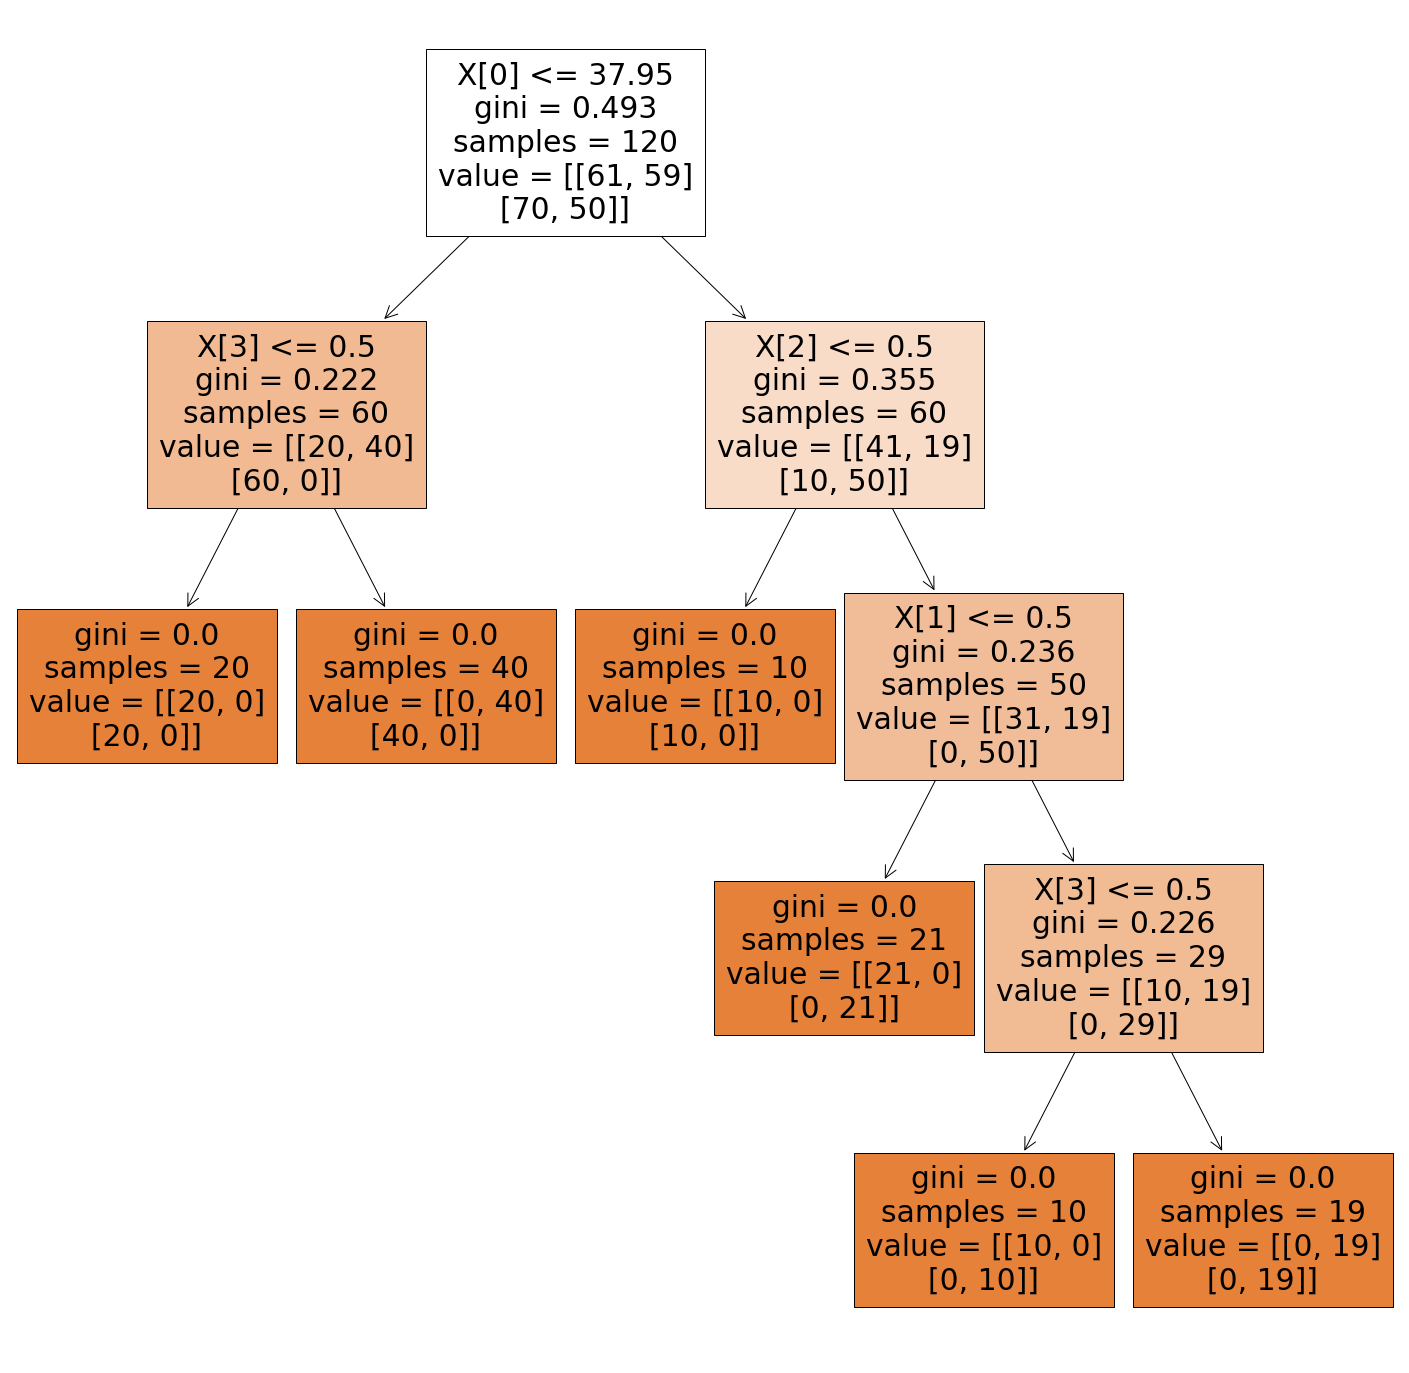

In [5]:
plt.figure(figsize=(25,25))
classifier1 = DecisionTreeClassifier()
classifier1.fit(X, y)
text = tree.export_text(classifier1)
print("\033[1mDECISION TREE ON WHOLE DATASET X vs (decision_inflammation,decision_nephritis)")
print()
print(tree.export_text(classifier1))
tree.plot_tree(classifier1, filled=True)
plt.show()

DECISION TREE ON WHOLE DATASET X vs decision_inflammation

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1



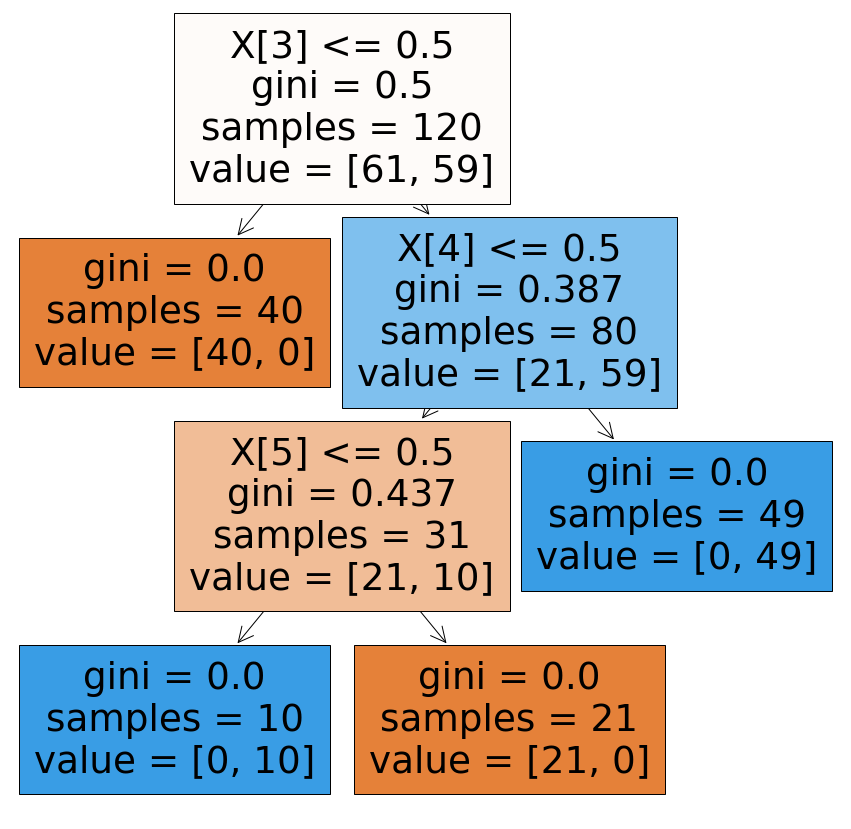

In [6]:
plt.figure(figsize=(15,15))

classifier.fit(X, y1)
print("\033[1mDECISION TREE ON WHOLE DATASET X vs decision_inflammation")
print()
print(tree.export_text(classifier))
tree.plot_tree(classifier, filled=True)
plt.show()

DECISION TREE ON WHOLE DATASET X vs decision_nephritis

|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1



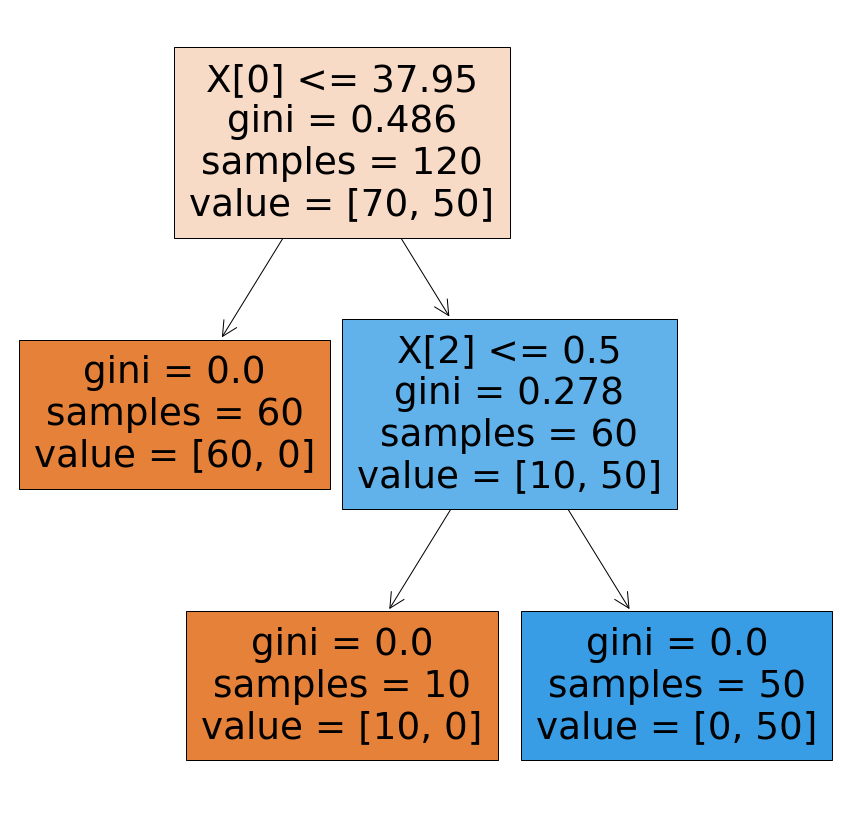

In [7]:
plt.figure(figsize=(15,15))

classifier.fit(X, y2)
print("\033[1mDECISION TREE ON WHOLE DATASET X vs decision_nephritis")
print()
print(tree.export_text(classifier))
tree.plot_tree(classifier, filled=True)
plt.show()

### (c) Convert the decision rules
Convert the decision rules into a set of IF-THEN rules.

In [8]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [9]:
tree_to_code(classifier1, X.columns[:6])

def tree(temperature, occurence_of_nausea, lumbar_pain, urine_pushing, micturition_pains, burning_of_urethra):
  if temperature <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if temperature > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if lumbar_pain > 0.5
      if occurence_of_nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if occurence_of_nausea > 0.5
        if urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Complexity Pruning

Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.

In [10]:
params = {'ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03], 'criterion': ['gini','entropy'], 'max_depth': [i for i in range(1,20)]}

In [11]:
dt = DecisionTreeClassifier(random_state = 69)
dt = GridSearchCV(dt, cv = 5, param_grid = params)
dt.fit(X, y)
print("Best params: ", dt.best_params_)

Best params:  {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4}


In [12]:
dt_model = DecisionTreeClassifier(random_state = 69, ccp_alpha = 0.0, criterion =  'gini', max_depth = 4)
dt_model.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=69)

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



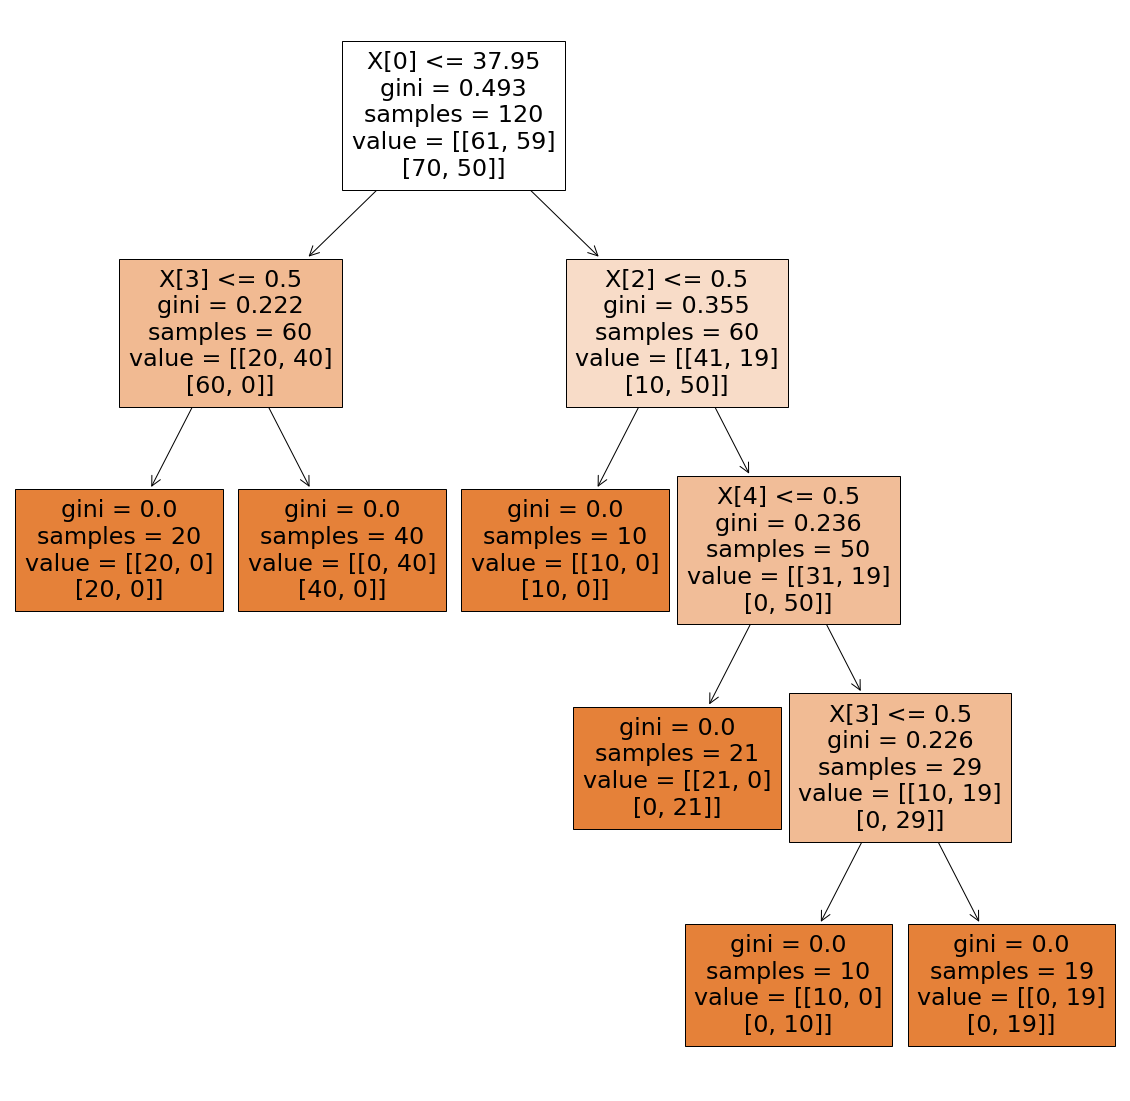

In [13]:
plt.figure(figsize=(20,20))

print(tree.export_text(dt_model))
tree.plot_tree(dt_model, filled = True)
plt.show()

In [14]:
tree_to_code(dt_model, X.columns[:6])

def tree(temperature, occurence_of_nausea, lumbar_pain, urine_pushing, micturition_pains, burning_of_urethra):
  if temperature <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if temperature > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if lumbar_pain > 0.5
      if micturition_pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if micturition_pains > 0.5
        if urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


# 

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data
Download the Communities and Crime data
from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [15]:
column_names = [line.split()[1] for line in open("../data/communities.names") if '@attribute' in line]
communities_data = pd.read_csv("../data/communities.data", na_values='?', header = None, names = column_names)
communities_data

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [16]:
communities_data_train, communities_data_test = communities_data[:1495],communities_data[1495:]
communities_data_train

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1490      6     NaN        NaN     Hillsboroughtown     8        0.00   
1491      6     NaN        NaN           Orangecity     8        0.16   
1492     13     NaN        NaN         Waycrosscity     8        0.01   
1493     39    85.0    49056.0           Mentorcity     8        0.06   
1494     34    17.0    79610.0      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22        NaN            NaN                  NaN   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01        NaN            NaN                  NaN   
1493     0.15            0.02        NaN            NaN                  NaN   
1494     1.00            1.00       0.00           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1490                  NaN                 0.00              NaN   
1491                  0.5                 0.61             0.19   
1492                  NaN                 0.00              NaN   
1493                  NaN                 0.00              NaN   
1494                  0.0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

In [17]:
communities_data_test

state  county  community      communityname  fold  population  \
1495      6     NaN        NaN     MillValleycity     8        0.00   
1496     48     NaN        NaN        LiveOakcity     8        0.00   
1497     35     NaN        NaN       Portalescity     8        0.00   
1498     42    17.0    25112.0      Fallstownship     8        0.04   
1499     51   683.0    48952.0       Manassascity     8        0.03   
...     ...     ...        ...                ...   ...         ...   
1989     12     NaN        NaN  TempleTerracecity    10        0.01   
1990      6     NaN        NaN        Seasidecity    10        0.05   
1991      9     9.0    80070.0      Waterburytown    10        0.16   
1992     25    17.0    72600.0        Walthamcity    10        0.08   
1993      6     NaN        NaN        Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
1495           0.20          0.03          0.91          0.23  ...      0.01   
1496           0.55          0.13          0.78          0.15  ...      0.01   
1497           0.52          0.04          0.59          0.05  ...      0.01   
1498           0.51          0.07          0.92          0.09  ...      0.06   
1499           0.59          0.20          0.75          0.19  ...      0.03   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
1495     0.23            0.73        NaN            NaN                  NaN   
1496     0.18            0.02        NaN            NaN                  NaN   
1497     0.18            0.00        NaN            NaN                  NaN   
1498     0.13            0.16        NaN            NaN                  NaN   
1499     0.23            0.06        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
1495                  NaN                 0.00              NaN   
1496                  NaN                 0.00              NaN   
1497                  NaN                 0.00              NaN   
1498                  NaN                 0.00              NaN   
1499                  NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
1495                 0.12  
1496                 0.11  
1497                 0.12  
1498                 0.06  
1499                 0.12  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[499 rows x 128 columns]

### (b) Missing values
The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [18]:
non_predictive_cols = communities_data.columns[:5]
cols_with_missing_values = communities_data.columns[5:][communities_data.iloc[:, 5:].isnull().any()]

In [19]:
def fill_missing_values_with_mean(data):
    data.drop(columns=non_predictive_cols, inplace=True)
    imputer = SimpleImputer(strategy='mean')
    data[cols_with_missing_values] = imputer.fit_transform(data[cols_with_missing_values])
    return data

In [20]:
communities_data_imputation = fill_missing_values_with_mean(communities_data.copy())
communities_train_data_imputation = fill_missing_values_with_mean(communities_data_train.copy())
communities_test_data_imputation = fill_missing_values_with_mean(communities_data_test.copy())
communities_data_imputation

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163103       0.076708   
2         0.01     0.21            0.02   0.163103       0.076708   
3         0.02     0.39            0.28   0.163103       0.076708   
4         0.04     0.09            0.02   0.163103       0.076708   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163103       0.076708   
1990      0.02     0.37            0.20   0.163103       0.076708   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.698589             0.440439                 0.00   
2                0.698589             0.440439                 0.00   
3                0.698589             0.440439                 0.00   
4                0.698589             0.440439                 0.00   
...                   ...                  ...                  ...   
1989             0.698589             0.440439                 0.00   
1990             0.698589             0.440439                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.195078                 0.67  
2            0.195078                 0.43  
3            0.195078                 0.12  
4            0.195078                 0.03  
...               ...                  ...  
1989         0.195078                 0.09  
1990         0.195078                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

### (c) Plot a correlation matrix
Plot a correlation matrix for the features in the data set.

In [111]:
plt.figure(figsize=(80, 80))
correlation_matrix = communities_data_imputation.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### (d) Calculate the Coefficient of Variation CV
Calculate the Coefficient of Variation
CV
for each feature, where
CV
=
s/m
, in
which
s
is sample standard deviation and
m
is sample mean.

In [21]:
column_stats = {}
for column_name in communities_data_imputation.columns:
    column_mean = communities_data_imputation[column_name].mean()
    column_std = communities_data_imputation[column_name].std()
    column_cv = column_std / column_mean
    column_stats[column_name] = [column_mean, column_std, column_cv]

column_stats_df = pd.DataFrame(column_stats)

column_stats_df.index = ['Mean', 'Standard Deviation', 'Coefficient of Variation']

column_stats_df = column_stats_df.T
column_stats_df

Mean  Standard Deviation  Coefficient of Variation
population           0.057593            0.126906                  2.203503
householdsize        0.463395            0.163717                  0.353298
racepctblack         0.179629            0.253442                  1.410920
racePctWhite         0.753716            0.244039                  0.323782
racePctAsian         0.153681            0.208877                  1.359162
...                       ...                 ...                       ...
LemasPctPolicOnPatr  0.698589            0.085459                  0.122331
LemasGangUnitDeploy  0.440439            0.162099                  0.368040
LemasPctOfficDrugUn  0.094052            0.240328                  2.555266
PolicBudgPerPop      0.195078            0.065796                  0.337281
ViolentCrimesPerPop  0.237979            0.232985                  0.979015

[123 rows x 3 columns]

### (e) Scatter plots and box plots for highest CV features
Pick
|√128|
features with highest
CV
, and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [22]:
column_stats_df = column_stats_df['Coefficient of Variation'].sort_values(ascending = False)
highest_cv_feat = column_stats_df[ : int(np.sqrt(128))]
highest_cv_feat

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
Name: Coefficient of Variation, dtype: float64

In [ ]:
sns.pairplot(communities_data_imputation[highest_cv_feat.index])
plt.show()

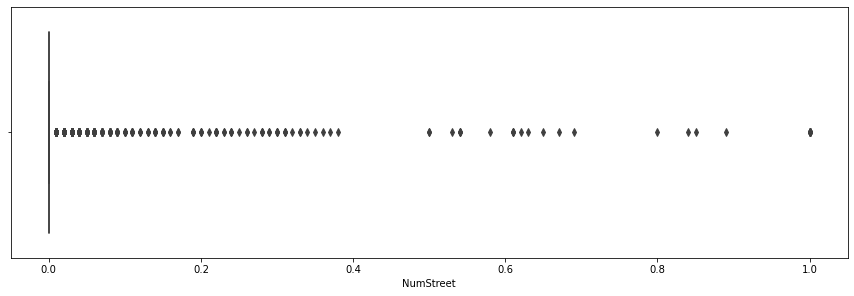

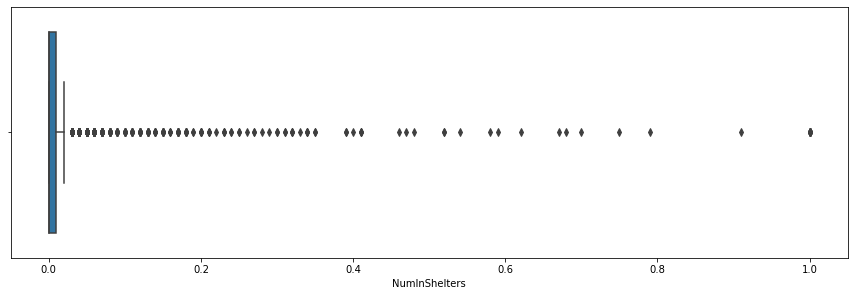

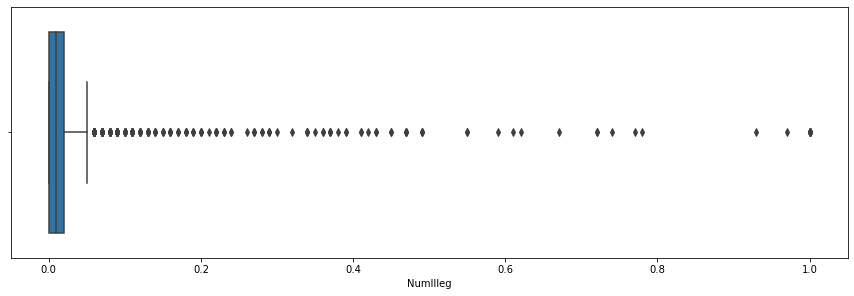

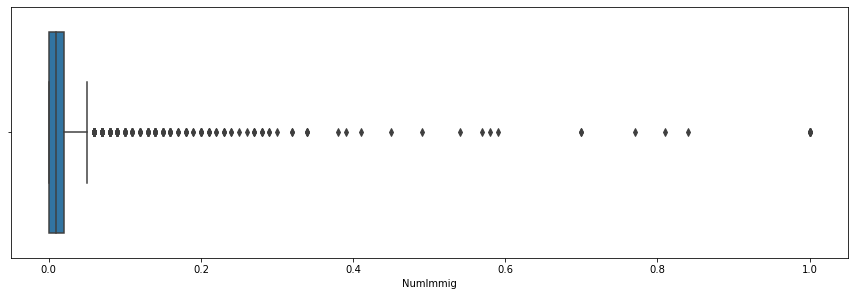

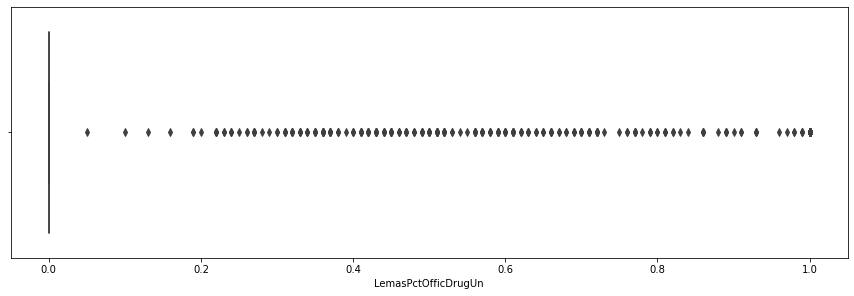

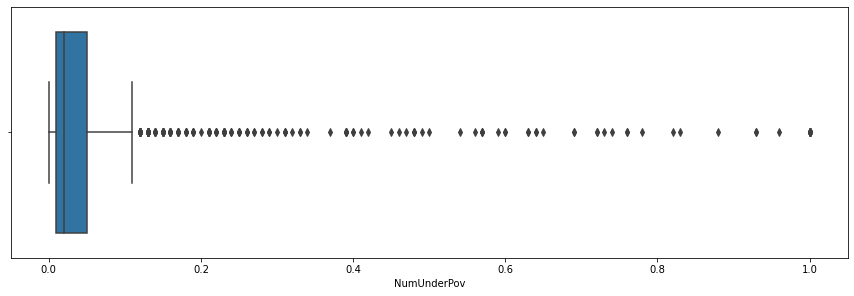

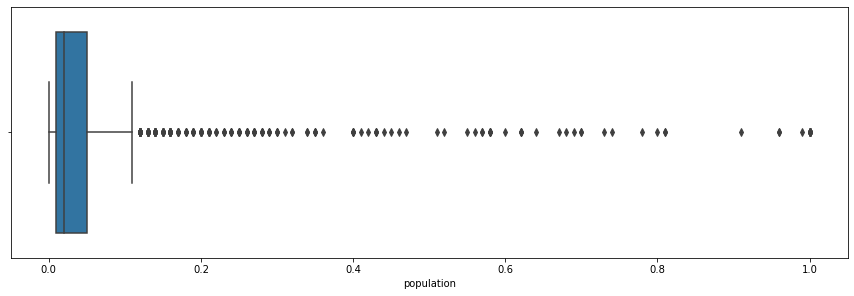

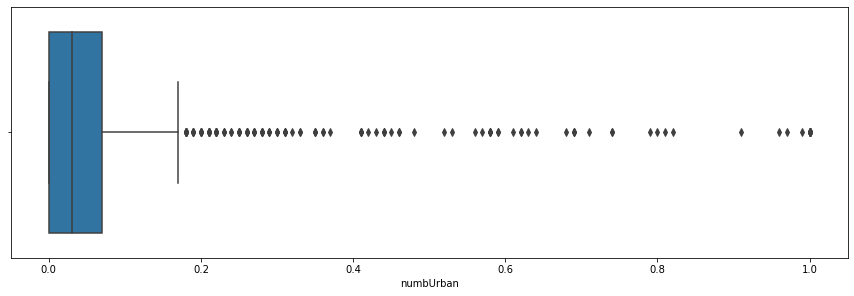

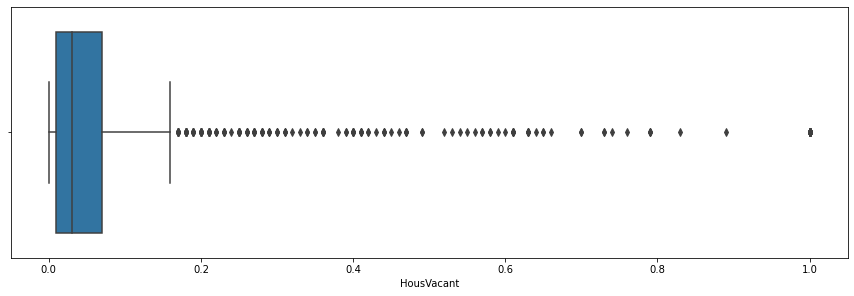

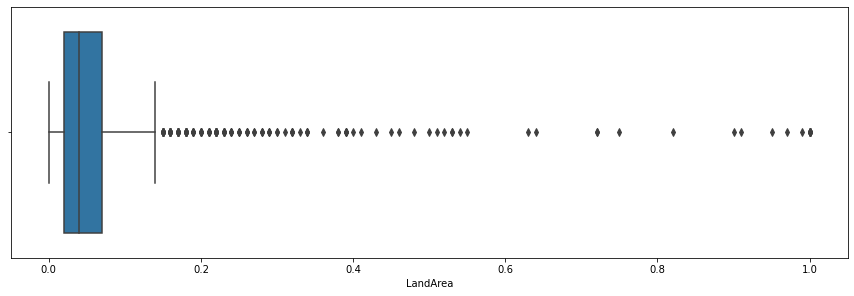

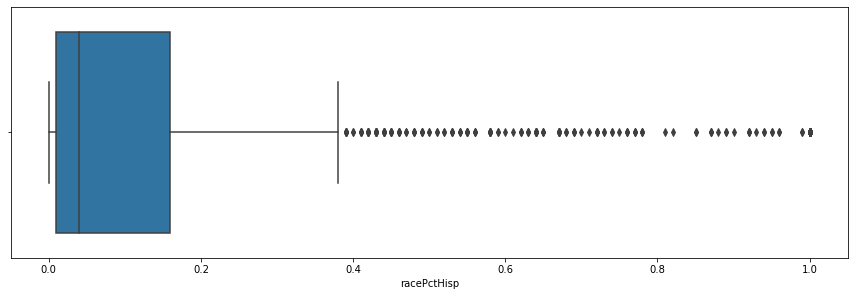

In [24]:
for i, feature in enumerate(highest_cv_feat.index):
    plt.figure(figsize=(15, 60))
    plt.subplot(len(highest_cv_feat), 1,i+1)
    sns.boxplot(x = feature, data = communities_data_imputation)
    plt.show()

### Discussion
- Numstreets and LemasPctOfficeDrugUn have relatively low coefficient of variation (CV), suggesting less variability in their data distribution.
- The scatterplots indicate that data points are widely scattered, making it challenging to draw conclusions based solely on scatterplots.
- The combination of scatterplots and box plots may provide better insight, especially as the number of data points increases.

These insights suggest that Numstreets and LemasPctOfficeDrugUn may have more consistent or stable data patterns, making them potentially useful for predictive modeling or analysis.

### (f) Fit a linear model
Fit a linear model using least squares to the training set and report the test error.

In [25]:
X_train, y_train, X_test, y_test = communities_train_data_imputation.iloc[:, :-1], communities_train_data_imputation.iloc[:, -1:], communities_test_data_imputation.iloc[:, :-1], communities_test_data_imputation.iloc[:, -1:]

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.857
Model:                             OLS   Adj. R-squared (uncentered):              0.845
Method:                  Least Squares   F-statistic:                              68.25
Date:                 Fri, 27 Oct 2023   Prob (F-statistic):                        0.00
Time:                         17:57:58   Log-Likelihood:                          955.27
No. Observations:                 1495   AIC:                                     -1669.
Df Residuals:                     1374   BIC:                                     -1026.
Df Model:                          121                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [38]:
all_results = {}
y_pred_train = model.predict(X_train)
print("Train MSE : ", mean_squared_error(y_train, y_pred_train))

X_test_const = sm.add_constant(X_test)
lr_y_pred_test = model.predict(X_test)
all_results['Linear Regression'] = mean_squared_error(y_test, lr_y_pred_test)
print("Test MSE  : ", mean_squared_error(y_test, lr_y_pred_test))

Train MSE :  0.010369806711494713
Test MSE  :  0.017536786695614606


### (g) Fit a ridge regression model
Fit a ridge regression model on the training set, with
λ
chosen by cross-validation.
Report the test error obtained.

In [27]:
alpha_values = [10 ** (-i) for i in range(5, -6, -1)]

In [40]:
model = RidgeCV(alphas = alpha_values, cv = KFold(n_splits = 5, random_state = 1, shuffle = True))
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
best_alpha = model.alpha_
ridge_mse_test = mean_squared_error(y_test, y_pred_test)
all_results['Ridge Regression'] = ridge_mse_test
print("Best alpha (lambda):",best_alpha)
print("Test MSE           :",ridge_mse_test)

Best alpha (lambda): 1.0
Test MSE           : 0.017723737122827807


<p></p>

### (h) Fit a LASSO model
Fit a LASSO model on the training set, with
λ
chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized
4
features. Report the test error for both cases and
compare them

In [41]:
model = LassoCV(alphas = alpha_values, cv = KFold(n_splits = 5, random_state = 1, shuffle = True))
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
best_alpha = model.alpha_
lasso_mse_test = mean_squared_error(y_test, y_pred_test)
all_results['Lasso Regression'] = lasso_mse_test
print("Best alpha (lambda):",best_alpha)
print("Test MSE           :",lasso_mse_test)

Best alpha (lambda): 0.0001
Test MSE           : 0.01776646555537784


In [42]:
selected_features = [(X_train.columns[i], coef) for i, coef in enumerate(model.coef_) if coef != 0]
print("\nTotal selected features:", len(selected_features))
selected_features


Total selected features: 78


[('racepctblack', 0.27305203893247),
 ('racePctAsian', -0.017982140855571385),
 ('agePct12t21', 0.07600144588877854),
 ('agePct12t29', -0.291125089387476),
 ('agePct65up', 0.0038731814542999894),
 ('pctUrban', 0.04099460840340385),
 ('pctWWage', -0.09316409100565634),
 ('pctWFarmSelf', 0.029058209023502056),
 ('pctWInvInc', -0.11005720598186115),
 ('pctWSocSec', 0.05923780277163923),
 ('pctWPubAsst', 0.04182285101160365),
 ('pctWRetire', -0.10979717754165423),
 ('whitePerCap', -0.06946043558641338),
 ('blackPerCap', -0.022540084214983637),
 ('indianPerCap', -0.03194571911235185),
 ('AsianPerCap', 0.029238819967555178),
 ('OtherPerCap', 0.02361887602723153),
 ('HispPerCap', 0.025708960910019805),
 ('PctPopUnderPov', -0.150124757087652),
 ('PctLess9thGrade', -0.021300485296412004),
 ('PctBSorMore', 0.01731481475981169),
 ('PctEmploy', 0.15500979986678234),
 ('PctEmplManu', -0.01919700635955916),
 ('PctOccupManu', 0.016491893545624962),
 ('MalePctDivorce', 0.13263026470846673),
 ('MalePct

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

model = LassoCV(alphas = alpha_values, cv = KFold(n_splits = 5, random_state = 1, shuffle = True))
model.fit(X_train_std, y_train)
y_pred_test = model.predict(X_test_std)
best_alpha = model.alpha_
standardized_lasso_mse_test = mean_squared_error(y_test, y_pred_test)
all_results['Standardized LASSO'] = standardized_lasso_mse_test
print("Best alpha (lambda):",best_alpha)
print("Test MSE           :",standardized_lasso_mse_test)

Best alpha (lambda): 0.001
Test MSE           : 0.0179550520850434


In [44]:
selected_features = [(X_train.columns[i], coef) for i, coef in enumerate(model.coef_) if coef != 0]
print("\nTotal selected features:", len(selected_features))
selected_features


Total selected features: 68


[('racepctblack', 0.06680512825788618),
 ('agePct12t21', 0.00526467733319539),
 ('agePct12t29', -0.02857171091903405),
 ('pctUrban', 0.015660117223775024),
 ('pctWWage', -0.008793259245822617),
 ('pctWFarmSelf', 0.0029117750314069514),
 ('pctWInvInc', -0.01810930571056031),
 ('pctWSocSec', 0.0068236296339919495),
 ('pctWPubAsst', 0.003514499353164585),
 ('pctWRetire', -0.01568136739498796),
 ('whitePerCap', -0.004088978639064056),
 ('blackPerCap', -0.0031269461222273925),
 ('indianPerCap', -0.0049933492219178385),
 ('AsianPerCap', 0.004857274113362948),
 ('OtherPerCap', 0.003445155743500518),
 ('HispPerCap', 0.003116276640704338),
 ('PctPopUnderPov', -0.020984108302095544),
 ('PctLess9thGrade', -0.00017471454321970348),
 ('PctEmploy', 0.014349934315298641),
 ('PctEmplManu', -0.00019404105227108893),
 ('MalePctDivorce', 0.01506135730825282),
 ('MalePctNevMarr', 0.015087249189481582),
 ('FemalePctDiv', -0.0024292745612044587),
 ('PctKids2Par', -0.03964423255931228),
 ('PctYoungKids2Par',

### Discussion

The test error is only slightly different between the model trained on standardized and non-standardized data. Surprisingly, the non-standardized data yields a slightly lower test MSE than the standardized data.

<p></p>

### (i) Fit a PCR model
Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained

In [45]:
score_val = []

for i in range(1, len(X_train.columns) + 1):
    pca = PCA(n_components=i)
    model = LinearRegression(fit_intercept=True)
    scores = cross_val_score(make_pipeline(pca, model), X_train, y_train, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    score_val.append(-scores.mean())

best_comp = np.argmin(score_val) + 1
minimum_error = scores[np.argmin(scores)]
print("Number of principal components chosen:", best_comp)

Number of principal components chosen: 96


In [46]:
pca = PCA(n_components=best_comp).fit(X_train)
lr = LinearRegression().fit(pca.transform(X_train), y_train)
pca_test_mse = mean_squared_error(y_test, lr.predict(pca.transform(X_test)))
all_results['PCR'] = pca_test_mse
print("Testing Error:", pca_test_mse)

Testing Error: 0.01844537692013644


<p></p>

### (j) Fit a boosting tree
In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use
L
1
-penalized regression at each node. Such a tree is called
L
1
penalized
gradient boosting tree. You can use XGBoost
to fit the model tree. Determine
α
(the regularization term) using cross-validation

In [47]:
alphas = list(range(100))
result_scores = [(-cross_val_score(xgb.XGBRegressor(reg_alpha = alpha), X_train, y_train, cv = 5, n_jobs = -1, scoring="neg_mean_squared_error").mean()) for alpha in alphas]
best_alpha = alphas[result_scores.index(min(result_scores))]
model = xgb.XGBRegressor(reg_alpha=best_alpha)
model.fit(X_train, y_train)
pred_test_y = model.predict(X_test)
xgboost_mse_test = mean_squared_error(y_test, pred_test_y)
all_results['XGBoost'] = xgboost_mse_test
print("Best alpha value (regularization term):", best_alpha)
print("Testing MSE:", xgboost_mse_test)

Best alpha value (regularization term): 4
Testing MSE: 0.017536786695614606


In [53]:
df = pd.DataFrame(list(all_results.items()), columns=['algorithm', 'MSE'])
df

algorithm       MSE
0   Linear Regression  0.017537
1    Ridge Regression  0.017724
2    Lasso Regression  0.017766
3  Standardized LASSO  0.017955
4                 PCR  0.018445
5             XGBoost  0.017537

<center><b>Thank You</b></center>